In [163]:
%matplotlib notebook

In [164]:
#get_ipython().run_line_magic('matplotlib', 'nootebook')
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")
mpl.get_backend()

'nbAgg'

In [165]:
kmpgex = pd.ExcelFile('KPMG_final.xlsx')
kmpgex.sheet_names
df = pd.read_excel('KPMG_final.xlsx', sheetname="CustomerDemographic")
#list(df)

In [166]:
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"fname",
                   "Unnamed: 2":"lname",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT"}, inplace = True)
df.rename(columns={"Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tenure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20


In [167]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_NA()
print(NaNlist, len(NaNlist))
# need to check columns
check = []
k     = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(3, 13):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87] 13


In [168]:
x = list(df['gender'])

In [169]:
x

['F',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'U',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Femal',
 'Male',
 'Male',
 'M',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female

In [172]:
print(df["DOB"][1].ctime().split(" ")[4])
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[tl-1])) 

print(k)

1953


KeyboardInterrupt: 

In [ ]:
df

In [171]:
len(list(df['tencure']))

4000

In [173]:
x = np.array(list(df['Age']))
x

array([66, 39, 65, ...,  0,  0,  0])

In [174]:
y = np.array( list(df['tencure']))
y

array([11., 16., 15., ..., nan, 10., 11.])

<IPython.core.display.Javascript object>


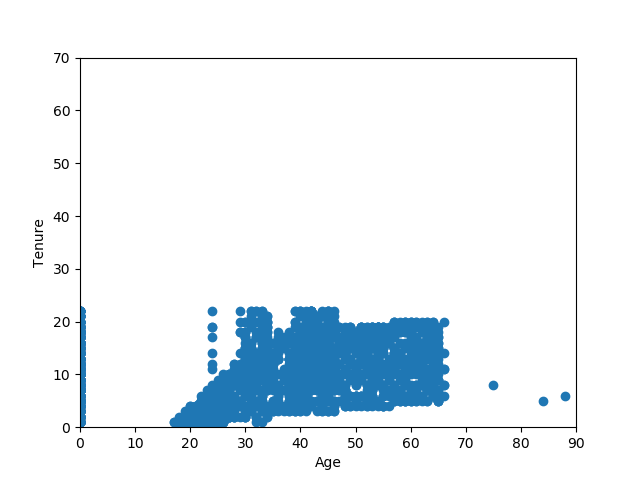

Text(0,0.5,'Tenure')

In [175]:
plt.figure()
plt.scatter(x,y)
ax=plt.gca()
ax.axis([0,90,0,70])
plt.xlabel('Age')
plt.ylabel('Tenure')

In [176]:
gender = np.array([0,0,0])
bike = np.array([0,0,0])
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1
bike[0] += df['3y_bike_purchases'][df['gender'] == 'Male'].sum() + df['3y_bike_purchases'][df['gender'] == 'M'].sum()
bike[1] += df['3y_bike_purchases'][df['gender'] == 'Female'].sum() + df['3y_bike_purchases'][df['gender'] == 'F'].sum()
bike[2] += df['3y_bike_purchases'][df['gender'] == 'U'].sum()


In [177]:
gender

array([2039, 1873,   88])

In [178]:
bike

array([93483, 98357,  3718])

<IPython.core.display.Javascript object>


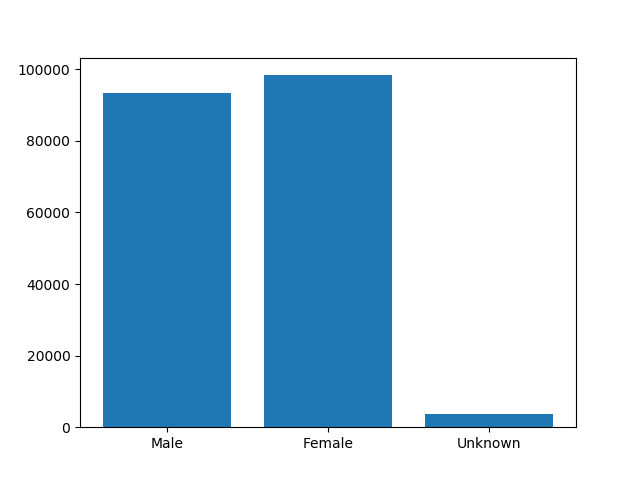

<BarContainer object of 3 artists>

In [189]:
x = np.array(['Male','Female','Unknown'])
plt.figure()
plt.bar(x,bike)

In [190]:
y=bike.sum()
y

195558

In [191]:
y =np.array([0,0,0])
for i in range(len(y)):
    y[0]=(bike[0]/bike.sum())*100
    y[1]=(bike[1]/bike.sum())*100
    y[2]=(bike[2]/bike.sum())*100
y

    

array([47, 50,  1])

<IPython.core.display.Javascript object>


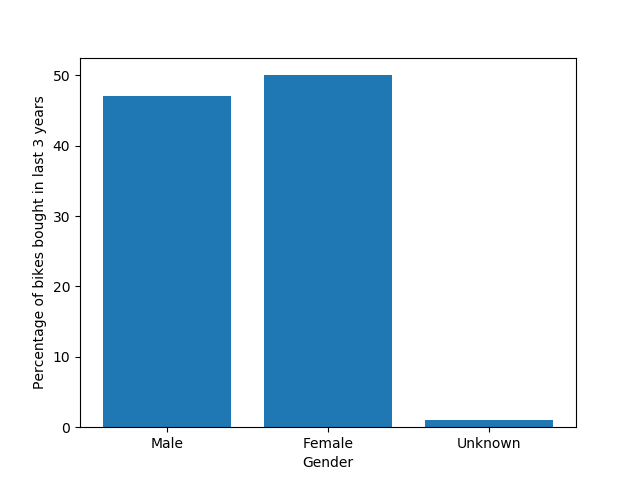

Text(0,0.5,'Percentage of bikes bought in last 3 years')

In [192]:
plt.figure()
plt.bar(x,y)
plt.xlabel('Gender')
plt.ylabel('Percentage of bikes bought in last 3 years')

In [193]:
age=np.array([0,0,0,0])
for i in range(1,len(df['Age'])):
    if df['Age'][i]<=25:
        age[0]+=1
    elif df['Age'][i]>25 and df['Age'][i]<50:
        age[1]+=1
    elif df['Age'][i]>=50 and df['Age'][i]<60:
        age[2]+=1
    else:
        age[3]+=1
age

array([2479, 1038,  302,  180])

<IPython.core.display.Javascript object>


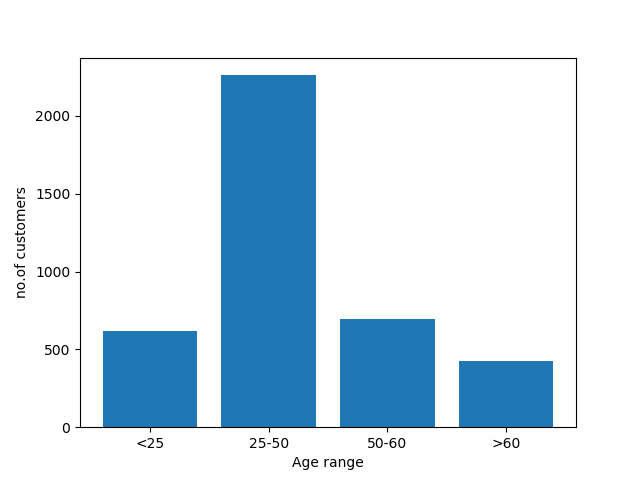

Text(0,0.5,'no.of customers')

In [69]:
x = np.array(['<25','25-50','50-60','>60'])
plt.figure()
plt.bar(x,age)
plt.xlabel('Age range')
plt.ylabel('no.of customers')

In [194]:
fgen=[]
fage=[]
mgen=[]
mage=[]
ugen=[]
uage=[]
for i in df.index:
    if df['gender'][i]=='Female':
        fgen.append(i)
        fage.append(df['Age'][i])
    elif df['gender'][i]=='Male':
        mgen.append(i)
        mage.append(df['Age'][i])
    if df['gender'][i]=='U':
        ugen.append(i)
        uage.append(df['Age'][i])
mage

[39,
 65,
 58,
 53,
 57,
 65,
 25,
 64,
 19,
 42,
 57,
 39,
 39,
 24,
 43,
 41,
 46,
 58,
 62,
 40,
 43,
 38,
 44,
 27,
 25,
 39,
 60,
 31,
 63,
 23,
 19,
 41,
 43,
 17,
 59,
 26,
 34,
 47,
 30,
 34,
 41,
 52,
 61,
 61,
 30,
 45,
 52,
 35,
 64,
 43,
 45,
 51,
 40,
 21,
 51,
 44,
 63,
 53,
 41,
 19,
 63,
 38,
 20,
 60,
 38,
 41,
 62,
 40,
 27,
 42,
 34,
 22,
 42,
 46,
 32,
 34,
 55,
 25,
 65,
 52,
 62,
 22,
 34,
 36,
 54,
 34,
 45,
 35,
 32,
 55,
 43,
 40,
 35,
 64,
 62,
 44,
 31,
 44,
 27,
 52,
 53,
 27,
 48,
 40,
 65,
 38,
 59,
 55,
 53,
 62,
 53,
 55,
 43,
 61,
 25,
 62,
 56,
 23,
 62,
 55,
 41,
 36,
 52,
 42,
 46,
 53,
 24,
 33,
 65,
 45,
 35,
 27,
 30,
 32,
 27,
 45,
 27,
 31,
 42,
 42,
 42,
 54,
 65,
 56,
 64,
 22,
 24,
 30,
 33,
 30,
 34,
 30,
 60,
 47,
 63,
 63,
 50,
 46,
 35,
 36,
 61,
 32,
 22,
 33,
 35,
 60,
 21,
 46,
 43,
 32,
 38,
 54,
 39,
 20,
 40,
 28,
 21,
 65,
 27,
 43,
 20,
 39,
 34,
 41,
 53,
 42,
 22,
 49,
 41,
 64,
 43,
 43,
 42,
 24,
 28,
 62,
 43,
 61,
 17,
 63,


In [184]:
far=np.array([0,0,0,0])
for i in range(1,len(fage)):
    if fage[i]<=25:
        far[0]+=1
    elif fage[i]>25 and fage[i]<50:
        far[1]+=1
    elif fage[i]>=50 and fage[i]<60:
        far[2]+=1
    else:
        far[3]+=1
far
    

array([1264,  544,  148,   80])

In [195]:
x = np.array(['<25','25-50','50-60','>60'])
mar=np.array([0,0,0,0])
for i in range(1,len(mage)):
    if mage[i]<=25:
        mar[0]+=1
    elif mage[i]>25 and mage[i]<50:
        mar[1]+=1
    elif mage[i]>=50 and mage[i]<60:
        mar[2]+=1
    else:
        mar[3]+=1
mar


array([1129,  491,  153,   98])

In [186]:
uar=np.array([0,0,0,0])
for i in range(1,len(uage)):
    if uage[i]<=25:
        uar[0]+=1
    elif uage[i]>25 and uage[i]<50:
        uar[1]+=1
    elif uage[i]>=50 and uage[i]<60:
        uar[2]+=1
    else:
        uar[3]+=1
uar

array([87,  0,  0,  0])

<IPython.core.display.Javascript object>


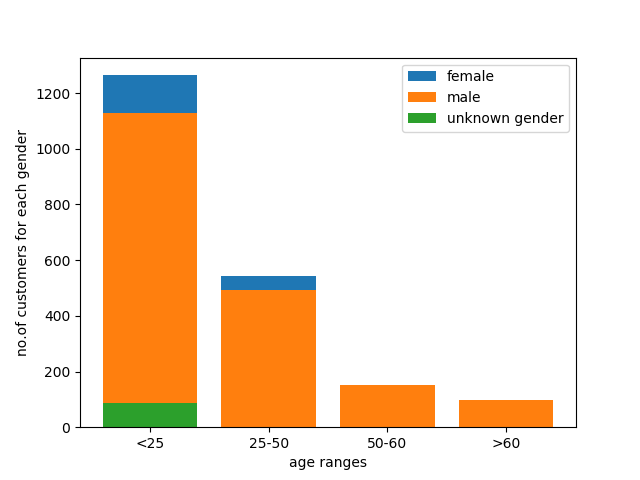

In [196]:
plt.figure()
plt.bar(x,far,label='female')
plt.bar(x,mar,label='male')
plt.bar(x,uar,label='unknown gender')
plt.xlabel('age ranges')
plt.ylabel('no.of customers for each gender')
plt.legend()
plt.savefig('image2.png')

In [197]:
x = np.array([0,0])
for i in df.index:
    if df['owns_car'][i]=='Yes':
        x[0]+=1
    else:
        x[1]+=1
x

array([2024, 1976])

<IPython.core.display.Javascript object>


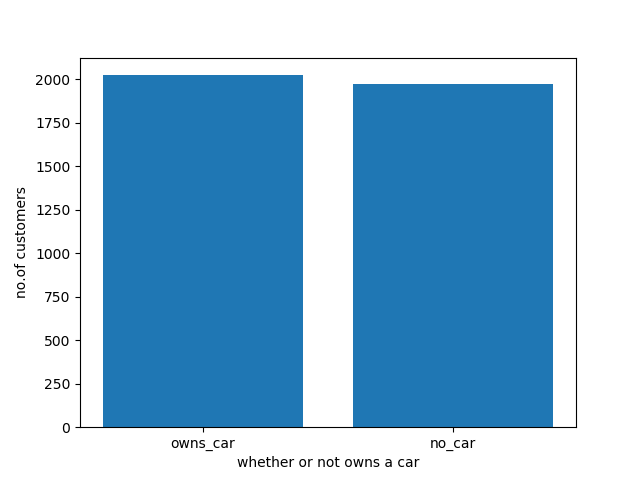

Text(0,0.5,'no.of customers')

In [125]:
y = np.array(['owns_car','no_car'])
plt.figure()
plt.bar(y,x)
plt.xlabel('whether or not owns a car')
plt.ylabel('no.of customers')

In [201]:
x = np.array(['Manu', 'Finance', 'Health', 'Retail', 'Property', 'IT', 'Entertainment', 'Agri', 'Telecom'])
len(df['JT'].unique())
df["Category"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: Category, dtype: int64

In [207]:
val = [203, 199, 152, 78, 64, 51, 37, 26, 25]
x = ['Manu', 'Finance', 'Health', 'Retail', 'Property', 'IT', 'Entertainment', 'Agri', 'Telecom']

<IPython.core.display.Javascript object>


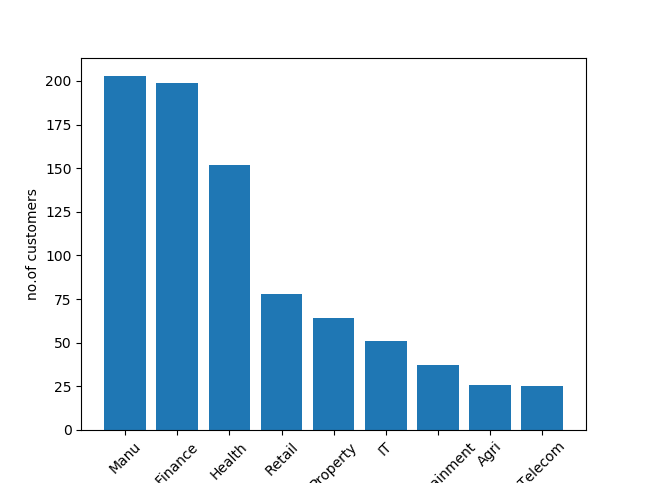

<IPython.core.display.Javascript object>


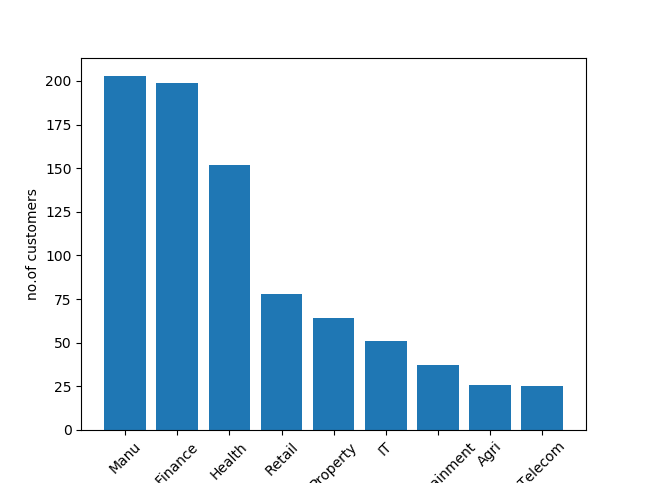

In [208]:
plt.figure()

In [209]:
plt.bar(x,val)

<BarContainer object of 9 artists>

In [212]:
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

In [213]:
plt.xlabel('Job category')
plt.ylabel('no.of customers')

Text(38.2222,0.5,'no.of customers')